## Comparing dB in Different Distances and Conditions

#### Table of Raw Data

#### Scatter Plot

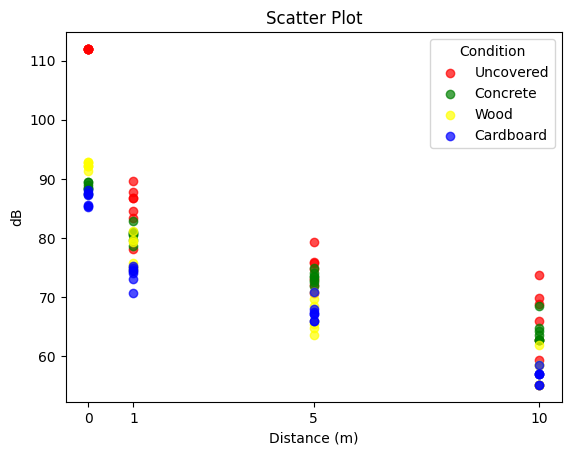

In [10]:
distance = data['Distance']
decibel = data['dB']
medium = data['Condition']

color_map = {
    "Uncovered": "red",
    "Concrete": "green",
    "Wood": "yellow",
    "Cardboard": "blue"
}

for condition, color in color_map.items():
    subset = data[data["Condition"] == condition]
    plt.scatter(
        subset["Distance"], 
        subset["dB"], 
        label=condition, 
        color=color, 
        alpha=0.7
    )

distance_list = distance.tolist()
decibel_list = decibel.tolist()

x = np.array(distance_list)
y = np.array(decibel_list)

plt.title('Scatter Plot')
plt.xticks([0, 1, 5, 10])
plt.xlabel('Distance (m)')
plt.ylabel('dB')
plt.legend(title="Condition")
plt.show()

#### ANOVA Table

In [11]:
model = ols('dB ~ C(Distance) + C(Condition) + C(Distance):C(Condition)', data=data).fit()
table = sm.stats.anova_lm(model, typ=2) 
print(table)

                                sum_sq    df           F        PR(>F)
C(Distance)               17613.870000   3.0  930.965645  8.377989e-71
C(Condition)               2720.648571   3.0  143.797493  2.189716e-35
C(Distance):C(Condition)   1348.630000   9.0   23.760218  8.178737e-21
Residual                    605.440000  96.0         NaN           NaN


### When to Reject Null Hypothesis?

>In a two-factor problem, the null hypothesis will be tested against the α-level of significance under factors A, B, and AB. It will be reject iff the computed f-value is greater than the critical value.

Since our computed values as shown in the third column are greater than their critical values. We can say that the dB of the speaker **varies significantly** when subjected to **different distances and mediums**. 